# Historical rail network in Northern Ireland

Goal: to get a feeling of the extent of the historical N.Ireland rail system by ploting points from an industrial heritage dataset. The dataset is available on [OpenData NI](https://www.opendatani.gov.uk/)

set up environment

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
%matplotlib inline

In [15]:
plt.rcParams['figure.figsize'] = (12, 12)

In [16]:
df_places = gpd.read_file('industrialheritagerecord.geojson') #import data

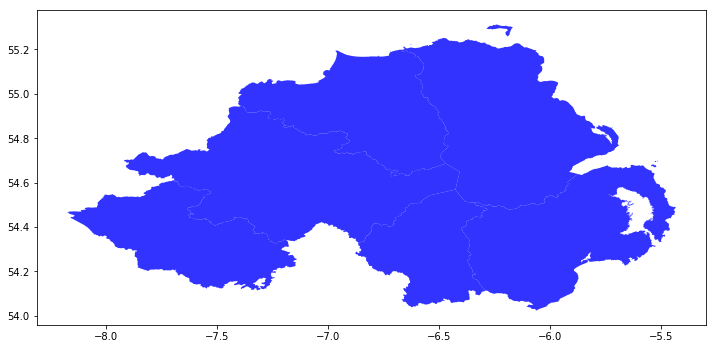

In [17]:
df_map = gpd.read_file('ni_counties.geojson') #import map
ax = df_map.plot(color='blue', alpha=0.8)

The map isn't great but I want to plot points from a geojson file onto a map defined by a geojson file so I'll use it instead of open street maps.

**industrial heritage sites**

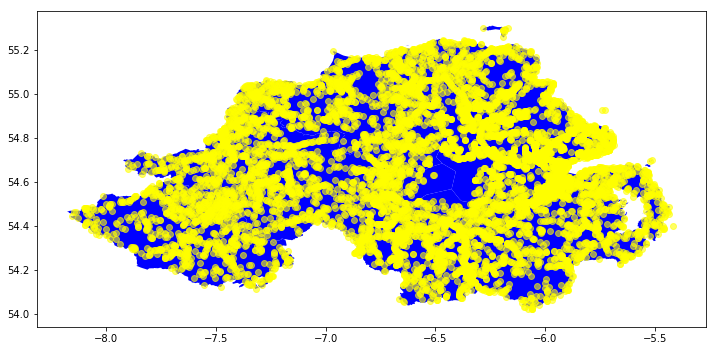

In [18]:
ax = df_map.plot(color='blue')
df_places.plot(ax=ax,color='yellow', alpha=0.6); #all data points plotted on map

Lough Neagh shows up nicely. But there's a bit too much data on here to be useful. Note some counties seem to have fewer sites - perhaps they were less industrial, particularly Fermanagh. Getting the value counts for each county shows Antrim has over five times as many industrial heritage sites as Fermanagh (in this dataset):

In [21]:
df_places['CO'].value_counts()

Antrim                  3717
Tyrone                  1811
Down                    1733
Londonderry             1370
Armagh                  1170
Fermanagh                710
Antrim / Down             23
Antirm                     6
Down / Antrim              5
Londonderry / Antrim       4
Antrim / Londonderry       4
Tyrone / Londonderry       3
Armagh / Tyrone            2
Londonderry / Tyrone       2
Armagh / Down              1
Fermanagh / Tyrone         1
Down / Armagh              1
Antrim - Londonderry       1
Name: CO, dtype: int64

There is potential for further study of this but I want to focus on the rail network.

In [22]:
df_places.head() # get a feeling for the data

I am densified (5 elements)
I am densified (5 elements)


,CO,TD,IHR,LOCATION,GRIDREF,X_TYPE,geometry
0,Armagh,Kernan / Seagoe Lower,00062:001:00,GNR Main Line Belfast - Border,J02485586,Watch House,POINT (-6.421226729791242 54.44094268405836)
1,Armagh,Clontyclay,00017:001:00,"GNR Branch Line, Portadown - L'Derry",H87605923,Bridge,POINT (-6.649498620245125 54.47398736612207)
2,Armagh,Drumman More,00231:001:00,"GNR Branch Line, Goraghwood - Armagh",H88854656,Road under railway,POINT (-6.634013095382388 54.3599834528699)
3,Armagh,Drumman More,00231:002:00,"GNR Branch Line, Goraghwood - Armagh",H89314667,Road over railway,POINT (-6.626906441448586 54.3608910612619)
4,Armagh,Clontyclay,00017:004:00,"GNR Branch Line, Portadown - L'Derry",H88095909,Railway Station,POINT (-6.64198427776158 54.47264536674442)


Using the X_TYPE field I will extract all values I think are linked to railways. 

In [25]:
pd.set_option('display.max_rows', 1000)
df_places.X_TYPE.value_counts()

Bridge                                                                             2210
Corn Kiln                                                                           439
Flax Mill site                                                                      395
Milepost                                                                            242
Flax Mill                                                                           210
Corn Mill site                                                                      205
Millrace                                                                            199
Mill Pond                                                                           110
Brickfield                                                                          108
Level Crossing                                                                       98
Corn Mill                                                                            96
Creamery                        

In [ ]:
station = ['Station','Railway Station','Station Facilities','Station & Goods Store','Railway Station, Goods Shed, Milepost & Bridge, Comber Junction','Ballyclare Junction - Ballyboley Junction','Cookstown Junction']
df_station = df_places[df_places['X_TYPE'].isin(station)]

viaduct = ('Viaduct','Railway Viaduct')
df_viaduct = df_places[df_places['X_TYPE'].isin(viaduct)]

bridge = ('Bridge (road over rail)','Bridge (rail over road)','Rail Bridge','Railway Bridge','Road crosses railway (bridge ?)','Road Bridge (over railway)','Bridge (ra/ro)','Road above railway (bridge ?)','Bridge ?  Railway above road','Level Crossing & Bridge')
df_bridge = df_places[df_places['X_TYPE'].isin(bridge)]

other = ('Turntable','Signal Post','Ballynahinch Junction','Signal Box')
df_other = df_places[df_places['X_TYPE'].isin(other)]

level_c = ('Level Crossing','Level Crossing & Milepost','Road crosses Railway','Milepost at Level Crossing','Milepost & Level Crossing','Milepost & Crossing')
df_level_c = df_places[df_places['X_TYPE'].isin(level_c)]

I can now plot the data on a map

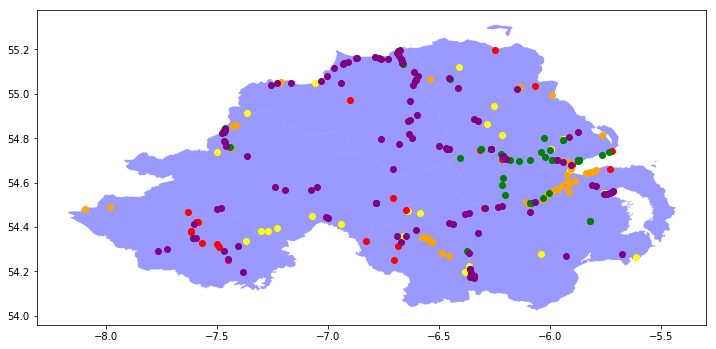

In [26]:
ax = df_map.plot(color='blue', alpha=0.4)
df_station.plot(ax=ax,color='yellow')
df_viaduct.plot(ax=ax,color='red')
df_bridge.plot(ax=ax,color='orange')
df_other.plot(ax=ax,color='green')
df_level_c.plot(ax=ax,color='purple');

The railways once extended into Armagh,Fermanagh and Tyrone. Towns like Armagh, Omagh, Eniskillen and Strabane are no longer connected to the rail network. It seems the railways also went up the west of Lough Neagh through places like Cookstown and Magherafelt.